<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r13-less-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-1-r13.csv?token=AKVFSOBQE7WEVKJNPHBZ7ZK63JGKG')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-11-r13.csv?token=AKVFSOCO6G7PCJACTCL6OTK63JGKO')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-4-m-1-r13.csv?token=AKVFSOGQYRVCLSVVEOETOXC63JGKS')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-4-m-11-r13.csv?token=AKVFSOB3HO5P6GDK67P6K4S63JGKW')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-6-m-1-r13.csv?token=AKVFSODFTZSKE5ITXKTDLXS63JGK2')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-6-m-11-r13.csv?token=AKVFSOF4G7RX52XQGBQHEIS63JGK6')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-9-m-1-r13.csv?token=AKVFSOAMLOTS5B3J2FMHWFS63JGLC')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-9-m-11-r13.csv?token=AKVFSOGLVST7JJQOPNQGS6C63JGLG')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-normal-n-0-15-r13.csv?token=AKVFSOAU4VSVFXRBDCFEQ6C63JGLM')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-normal-n-0-4-r13.csv?token=AKVFSOFV7M6DTXAWFI5NP3S63JGLQ')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-normal-n-0-6-r13.csv?token=AKVFSOFC42FQFWLHL7WWRQC63JGLW')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-normal-n-0-9-r13.csv?token=AKVFSOGKXSWEWNMUSHWBJRC63JGL4')

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(30078, 26)
(29449, 26)
(17693, 26)
(17102, 26)
(17344, 26)
(16753, 26)
(17973, 26)
(17382, 26)
(23965, 26)
(11572, 26)
(11257, 26)
(11848, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r12-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r12-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,92,4,2,1,1,4,3,9,15,15,24,8,4,4,2,0.5,12,4,1,4,4,8,16,3,27,0
1,92,4,2,1,1,4,3,9,15,15,24,8,3,4,2,0.5,12,4,1,4,4,8,12,3,27,1
2,110,4,2,1,1,4,3,9,15,15,24,8,5,4,2,0.5,12,4,1,4,4,8,20,3,27,0
3,402,3,2,1,1,4,3,9,15,15,21,5,13,4,2,0.5,12,3,2,4,6,6,52,3,27,0
4,404,3,2,1,1,4,3,9,15,15,21,5,9,4,2,0.5,12,3,2,4,6,6,36,3,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222411,3276263,3,2,5,2,2,3,9,15,15,17,1,30089,5,2,0.4,19,5,2,6,10,6,601780,15,135,0
222412,3276270,3,2,5,3,2,3,9,15,15,17,1,30089,5,2,0.4,26,4,3,6,12,6,902670,15,135,0
222413,3276277,3,2,5,4,2,3,9,15,15,17,1,30089,5,2,0.4,33,3,4,6,12,6,1203560,15,135,0
222414,3276284,3,2,5,5,3,3,9,15,15,17,1,30089,5,2,0.4,40,2,5,6,10,6,2256675,15,135,0


In [7]:
df.shape

(222416, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-12-r13.csv?token=AKVFSOAXXM3UU5GITOILMOC63JHPW')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-7-r13.csv?token=AKVFSOFKNO7OWYS5BRNHQZK63JHP4')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-4-m-12-r13.csv?token=AKVFSOGYU422BL6DF7RJ6HS63JHQA')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-4-m-7-r13.csv?token=AKVFSODPPLDKWC3NVAKQGVK63JHQE')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-6-m-12-r13.csv?token=AKVFSOBEBVBBJKZXWSQLBQ263JHQI')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-6-m-7-r13.csv?token=AKVFSOEX7RZOWF53SBAXS6K63JHQO')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-9-m-12-r13.csv?token=AKVFSOE3CS3PGH25O4QDKOC63JHQS')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-9-m-7-r13.csv?token=AKVFSOCLBNZLGDTYRDK7KKS63JHQW')

In [9]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(52184, 26)
(29449, 26)
(39427, 26)
(17102, 26)
(39084, 26)
(16753, 26)
(39713, 26)
(17382, 26)


In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,1141,2,4,2,1,4,3,9,28,12,27,11,36,4,1,0.25,8,12,1,12,12,8,288,6,54,0
1,1214,2,4,2,1,4,3,9,28,12,27,11,38,4,1,0.25,8,11,2,12,22,8,304,6,54,0
2,1274,2,4,2,1,4,3,9,28,12,27,11,40,4,1,0.25,8,10,3,12,30,8,320,6,54,0
3,1342,0,3,1,1,4,3,9,6,6,29,13,42,3,3,1.00,16,9,4,12,36,0,168,3,27,0
4,1350,2,0,2,1,4,3,9,29,13,27,11,42,3,0,0.00,4,8,5,12,40,0,336,6,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17339,3265172,2,0,6,5,3,3,10,29,13,27,11,30077,3,0,0.00,32,5,11,15,55,0,2706930,18,180,0
17340,3265173,2,0,2,1,4,3,11,29,13,27,11,30078,3,0,0.00,32,4,12,15,48,0,240624,6,66,0
17341,3265174,4,0,7,1,4,3,12,29,13,0,0,30077,4,0,0.00,6,3,13,15,39,0,842156,21,252,0
17342,3265236,0,3,3,1,4,3,9,27,11,29,13,30078,3,3,1.00,18,2,14,15,28,0,360936,9,81,0


Processing

In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.258831,0.261806,-0.075522,0.106597,NaN,0.082763,-0.047570,0.535224,-0.456239,-0.632984,-0.263984,-0.146866,-0.018562,-0.124917,-0.104551,0.622368,0.008200,0.261806,0.264638,0.050469
inport,-0.258831,1.000000,-0.103199,0.023189,-0.032730,NaN,-0.512572,0.024207,0.274547,0.483600,0.462193,0.220579,0.089539,-0.236990,-0.111342,-0.100866,0.568139,-0.003927,-0.103199,-0.247867,-0.012893
cache_coherence_type,0.261806,-0.103199,1.000000,0.286973,-0.405052,NaN,-0.064061,0.044811,0.080782,-0.328133,-0.356624,-0.538814,-0.000913,-0.071791,-0.054899,-0.037496,0.144787,0.327359,1.000000,0.954954,-0.014921
flit_id,-0.075522,0.023189,0.286973,1.000000,-0.181247,NaN,-0.143856,0.022510,-0.035184,0.002900,0.004688,0.545816,0.043987,0.014744,0.044348,0.055950,-0.016690,0.711101,0.286973,0.241280,0.006263
flit_type,0.106597,-0.032730,-0.405052,-0.181247,1.000000,NaN,0.203048,-0.031772,0.049661,-0.004094,-0.006616,0.291256,-0.222172,0.142382,-0.060250,-0.053361,0.023558,0.034129,-0.405052,-0.340559,-0.008840
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.082763,-0.512572,-0.064061,-0.143856,0.203048,NaN,1.000000,0.025710,-0.262083,-0.476265,-0.439014,-0.094267,-0.081548,0.202217,0.091118,0.085344,-0.301471,-0.042343,-0.064061,0.226062,-0.023241
traversal_id,-0.047570,0.024207,0.044811,0.022510,-0.031772,NaN,0.025710,1.000000,-0.052101,-0.025546,-0.009602,0.018787,0.174870,0.175605,0.264648,0.205687,-0.015925,0.503011,0.044811,0.048753,-0.312846
hop_count,0.535224,0.274547,0.080782,-0.035184,0.049661,NaN,-0.262083,-0.052101,1.000000,0.210933,-0.147596,0.048225,-0.084861,-0.151256,-0.178295,-0.144193,0.635782,-0.023772,0.080782,-0.008022,0.035826
current_hop,-0.456239,0.483600,-0.328133,0.002900,-0.004094,NaN,-0.476265,-0.025546,0.210933,1.000000,0.910184,0.402442,0.149187,-0.128709,0.015463,0.006196,-0.079080,-0.103996,-0.328133,-0.441812,0.018750


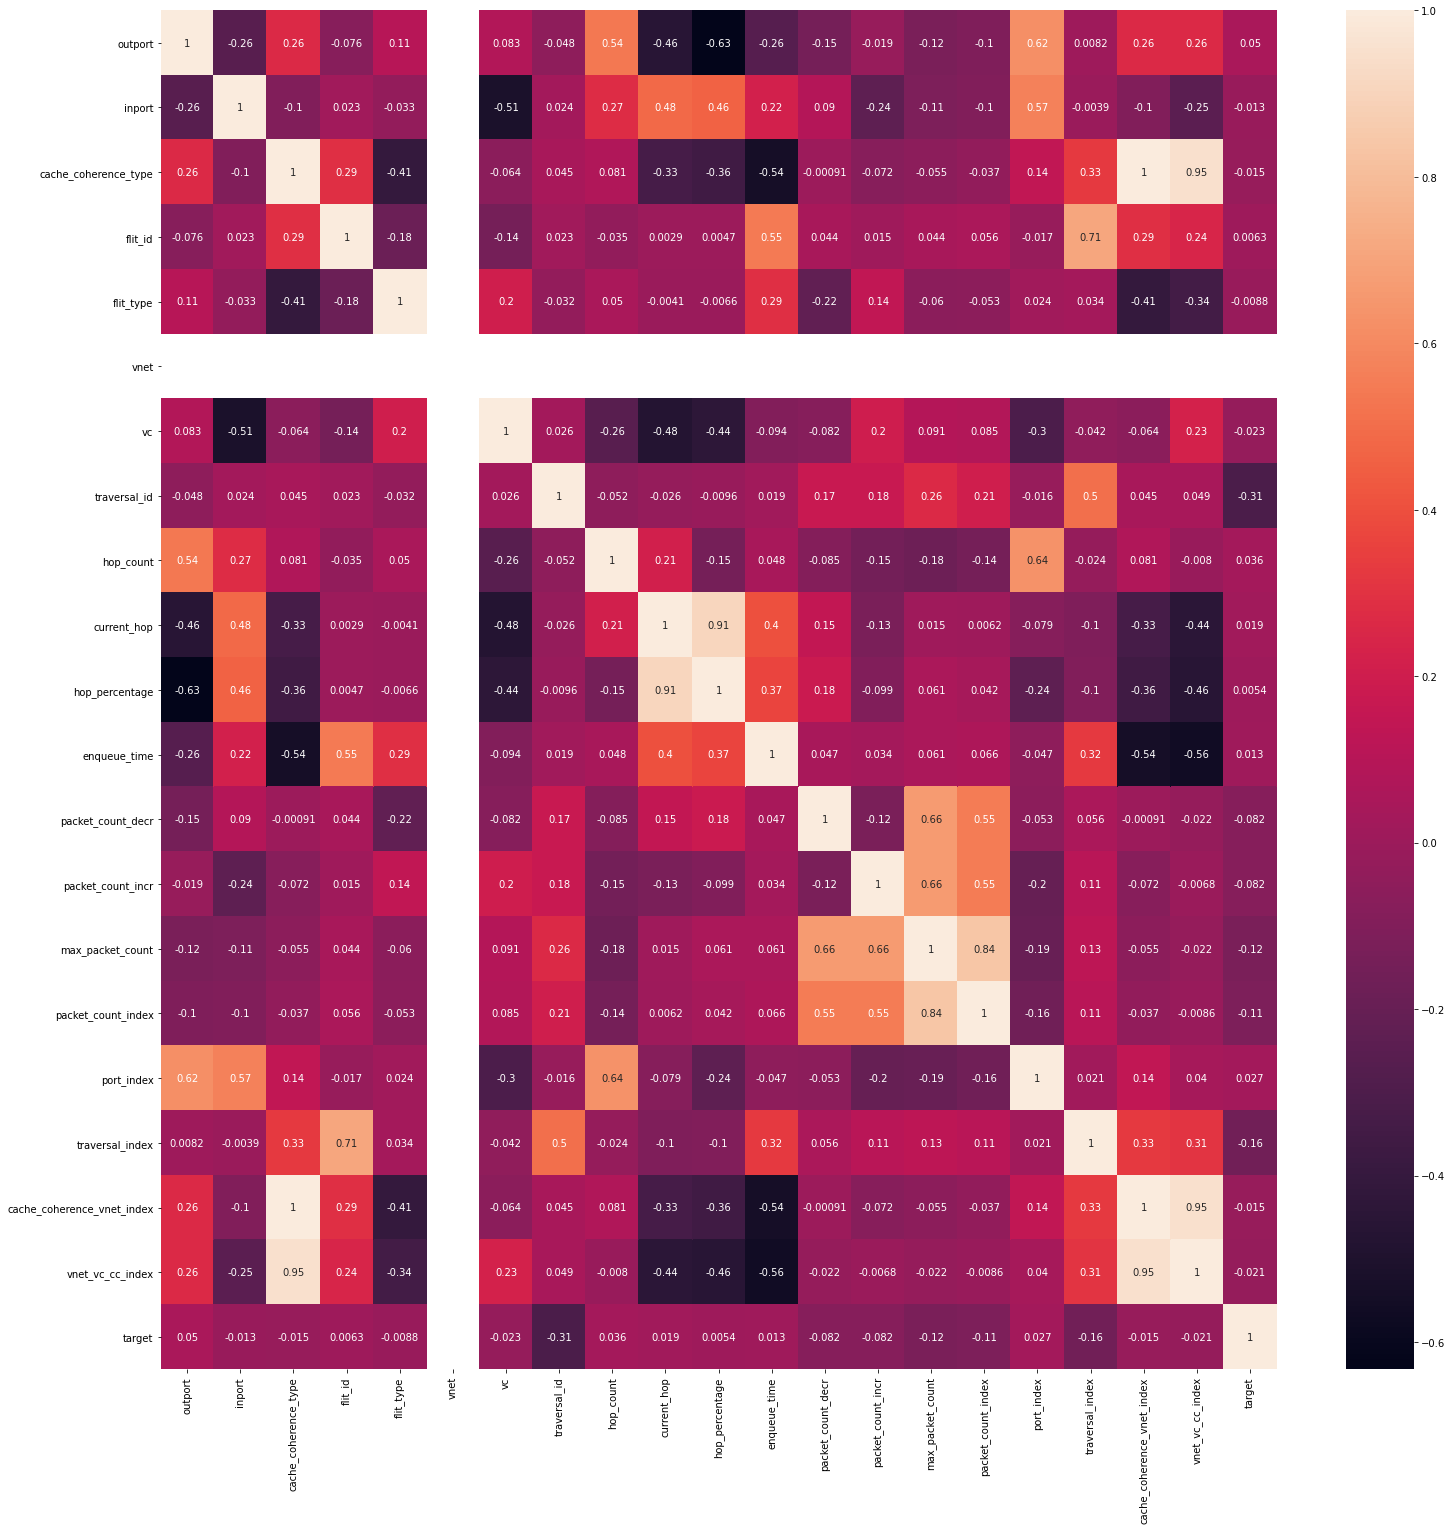

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'cache_coherence_type', 'current_hop']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

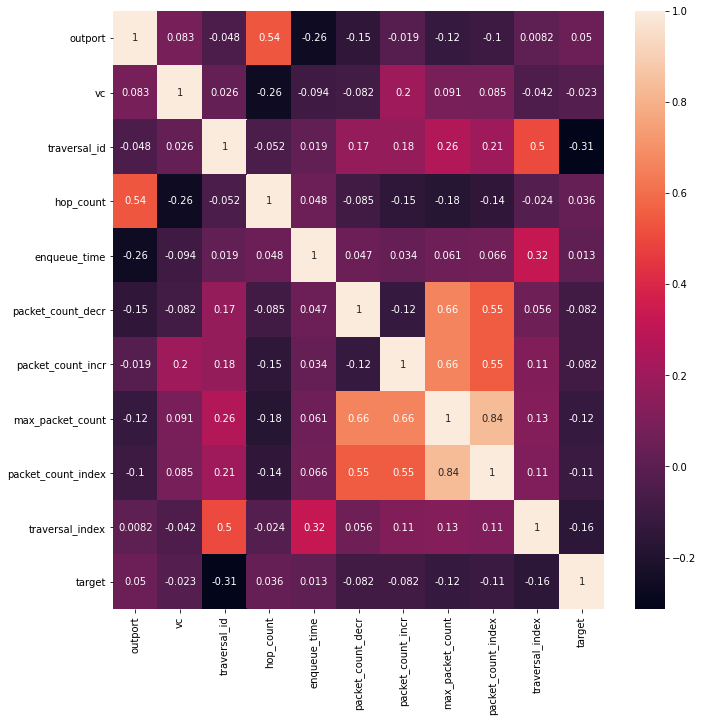

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

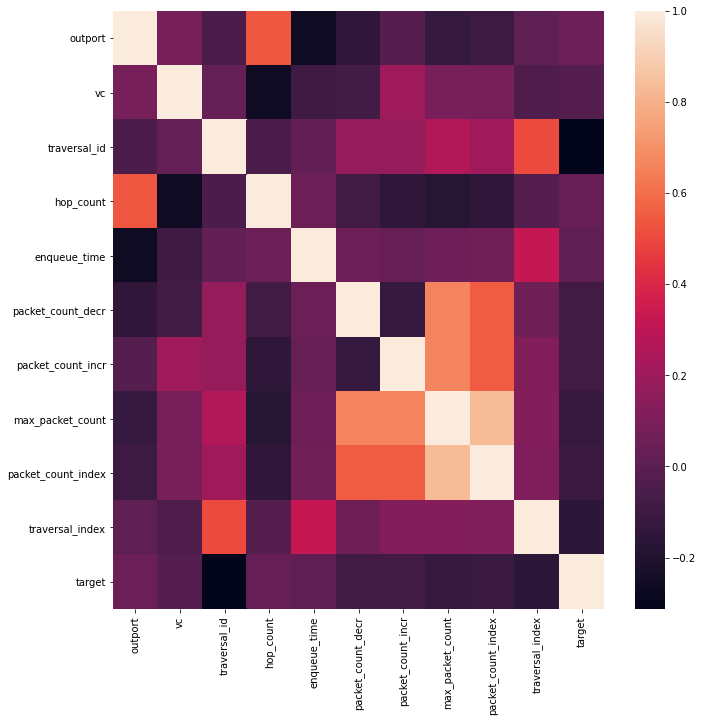

In [19]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [21]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000033,0.6,0.133333,0.038961,0.000000,0.038961,0.001924,0.000001
1,1.00,0.000000,0.000000,0.6,0.133333,0.038961,0.000000,0.038961,0.001924,0.000000
2,1.00,0.000000,0.000066,0.6,0.133333,0.038961,0.000000,0.038961,0.001924,0.000003
3,0.75,0.000000,0.000332,0.6,0.133333,0.025974,0.012987,0.038961,0.003207,0.000015
4,0.75,0.000000,0.000199,0.6,0.133333,0.025974,0.012987,0.038961,0.003207,0.000009
...,...,...,...,...,...,...,...,...,...,...
222411,0.75,0.000000,0.999967,0.8,0.250000,0.051948,0.012987,0.064935,0.005773,0.222263
222412,0.75,0.000000,0.999967,0.8,0.366667,0.038961,0.025974,0.064935,0.007056,0.333397
222413,0.75,0.000000,0.999967,0.8,0.483333,0.025974,0.038961,0.064935,0.007056,0.444531
222414,0.75,0.000000,0.999967,0.8,0.600000,0.012987,0.051948,0.064935,0.005773,0.833499


In [22]:
train_X[train_X.duplicated()].shape

(3280, 10)

In [23]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.8,0.067797,0.102804,0.000000,0.102804,0.003705,0.000000
1,1.00,0.000000,0.000067,0.6,0.135593,0.093458,0.009346,0.102804,0.007073,0.000003
2,0.50,0.000000,0.000233,0.6,0.067797,0.084112,0.018692,0.102804,0.009768,0.000010
3,0.50,0.000000,0.000333,0.8,0.067797,0.074766,0.028037,0.102804,0.011788,0.000015
4,0.75,0.000000,0.000366,0.6,0.135593,0.065421,0.037383,0.102804,0.013136,0.000016
...,...,...,...,...,...,...,...,...,...,...
52179,0.75,0.000000,0.999967,0.8,0.254237,0.037383,0.009346,0.046729,0.003031,0.222264
52180,0.75,0.000000,0.999967,0.8,0.372881,0.028037,0.018692,0.046729,0.003705,0.333398
52181,0.75,0.000000,0.999967,0.8,0.491525,0.018692,0.028037,0.046729,0.003705,0.444532
52182,0.75,0.000000,0.999967,0.8,0.610169,0.009346,0.037383,0.046729,0.003031,0.833499


In [24]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [25]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [26]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [27]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


In [28]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 10)


In [29]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 10)


In [30]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [32]:
train_Y = df['target']
train_Y.value_counts()

0    163774
1     58642
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  2358.444848
9     traversal_index   837.658820
7    max_packet_count   302.238327
8  packet_count_index   289.860370
5   packet_count_decr   151.658579
6   packet_count_incr   150.580663
0             outport    92.424032
1                  vc    48.166788
3           hop_count    13.831085
4        enqueue_time     3.832814


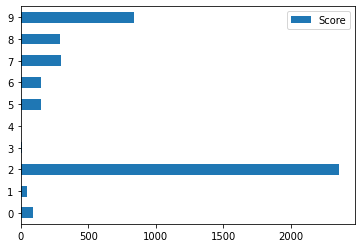

In [35]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r12.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [40]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.05860665872356
Test Prediction Score 93.97760992716482


In [41]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 82.69776176605856
Test Prediction Score 83.948521172196
Test Prediction Score 82.09602556623634
Test Prediction Score 78.70424511753012
Test Prediction Score 82.26895916487565
Test Prediction Score 84.09837044111502
Test Prediction Score 81.87998892050462
Test Prediction Score 83.53469105971695


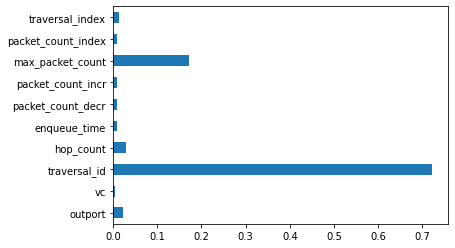

In [42]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

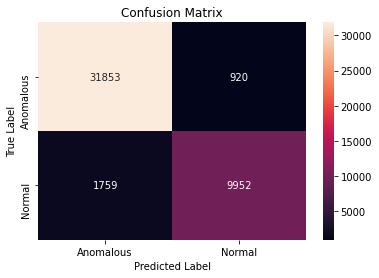

In [43]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     32773
           1       0.92      0.85      0.88     11711

    accuracy                           0.94     44484
   macro avg       0.93      0.91      0.92     44484
weighted avg       0.94      0.94      0.94     44484



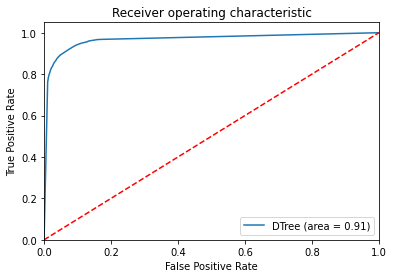

In [45]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r13l.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.93368253040488
Test Prediction Score 98.63546443665138


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 84.93407941131382
Test Prediction Score 87.16764576046725
Test Prediction Score 83.59246201841378
Test Prediction Score 82.00210501695709
Test Prediction Score 83.47917306314604
Test Prediction Score 86.99934340118189
Test Prediction Score 84.00020144537054
Test Prediction Score 83.82809803244736


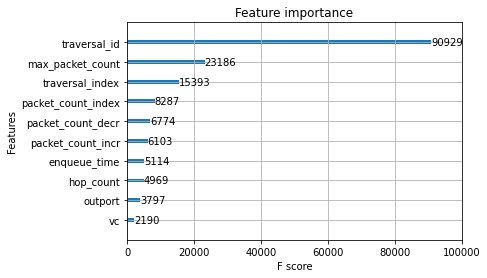

In [52]:
plot_importance(xgbc)
plt.show()

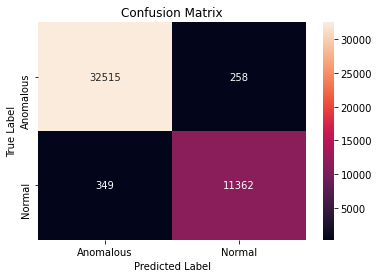

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     32773
           1       0.98      0.97      0.97     11711

    accuracy                           0.99     44484
   macro avg       0.98      0.98      0.98     44484
weighted avg       0.99      0.99      0.99     44484



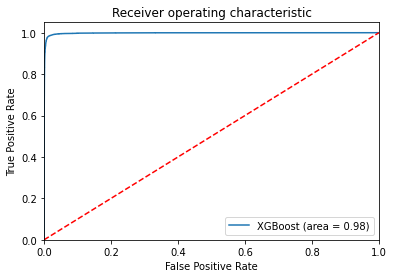

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()